In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/RASIL-RISAM/-covid-research-/main/all_training.csv")
df

,Unnamed: 0,Sex,Age,CA,CK,CREA,ALP,GGT,GLU,AST,...,MO,EO,BA,NET,LYT,MOT,EOT,BAT,Suspect,target
0,A00345_2020-03-25,1.0,82.0,2.09,NaN,1.150,95.0,40.0,78.0,26.0,...,9.5,2.9,0.5,6.40,1.20,0.8,0.3,0.0,1.0,0
1,A00791_2020-03-19,1.0,51.0,1.97,237.0,0.970,54.0,98.0,98.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
2,A00741_2020-03-04,1.0,58.0,2.11,NaN,1.000,80.0,147.0,106.0,41.0,...,7.3,0.3,0.1,5.45,0.75,0.5,0.0,0.0,1.0,0
3,A00605_2020-04-15,0.0,82.0,2.27,138.0,0.755,123.5,176.5,106.0,114.0,...,9.5,1.7,0.9,3.60,2.60,0.7,0.1,0.1,0.5,0
4,A00417_2020-02-24,1.0,79.0,2.07,73.0,1.810,62.0,36.5,96.0,28.0,...,10.0,8.5,0.5,0.40,0.50,0.1,0.1,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,49,0.0,NaN,2.38,40.0,0.800,68.0,9.0,128.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
1732,50,0.0,NaN,2.36,NaN,0.960,79.0,35.0,107.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
1733,51,1.0,NaN,2.28,NaN,1.420,NaN,NaN,136.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
1734,52,1.0,NaN,2.40,124.0,0.950,48.0,44.0,95.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1736 non-null   object 
 1   Sex         1736 non-null   float64
 2   Age         1682 non-null   float64
 3   CA          1643 non-null   float64
 4   CK          704 non-null    float64
 5   CREA        1662 non-null   float64
 6   ALP         1262 non-null   float64
 7   GGT         1300 non-null   float64
 8   GLU         1638 non-null   float64
 9   AST         1638 non-null   float64
 10  ALT         1640 non-null   float64
 11  LDH         1433 non-null   float64
 12  PCR         1639 non-null   float64
 13  KAL         1656 non-null   float64
 14  NAT         1663 non-null   float64
 15  UREA        1060 non-null   float64
 16  WBC         1673 non-null   float64
 17  RBC         1673 non-null   float64
 18  HGB         1673 non-null   float64
 19  HCT         1673 non-null  

In [6]:
df.rename(columns={'Unnamed: 0': 'Patient_id'}, inplace=True)
df = df.drop(columns="Patient_id")

In [7]:
df.isnull().sum()

Sex           0
Age          54
CA           93
CK         1032
CREA         74
ALP         474
GGT         436
GLU          98
AST          98
ALT          96
LDH         303
PCR          97
KAL          80
NAT          73
UREA        676
WBC          63
RBC          63
HGB          63
HCT          63
MCV          63
MCH          63
MCHC         63
PLT1         63
NE          362
LY          362
MO          362
EO          362
BA          362
NET         362
LYT         362
MOT         362
EOT         362
BAT         362
Suspect       0
target        0
dtype: int64

In [8]:
# import matplotlib.pyplot as plt

# corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
# plt.figure(figsize=(25, 10))
# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
# plt.show()

In [9]:
# df.fillna(df.mean(), inplace=True)

df = df.bfill()
df = df.ffill()

print(df.isnull().sum())
df.head()

Sex        0
Age        0
CA         0
CK         0
CREA       0
ALP        0
GGT        0
GLU        0
AST        0
ALT        0
LDH        0
PCR        0
KAL        0
NAT        0
UREA       0
WBC        0
RBC        0
HGB        0
HCT        0
MCV        0
MCH        0
MCHC       0
PLT1       0
NE         0
LY         0
MO         0
EO         0
BA         0
NET        0
LYT        0
MOT        0
EOT        0
BAT        0
Suspect    0
target     0
dtype: int64


,Sex,Age,CA,CK,CREA,ALP,GGT,GLU,AST,ALT,...,MO,EO,BA,NET,LYT,MOT,EOT,BAT,Suspect,target
0,1.0,82.0,2.09,237.0,1.150,95.0,40.0,78.0,26.0,21.0,...,9.5,2.9,0.5,6.40,1.20,0.8,0.3,0.0,1.0,0
1,1.0,51.0,1.97,237.0,0.970,54.0,98.0,98.0,74.0,84.0,...,7.3,0.3,0.1,5.45,0.75,0.5,0.0,0.0,1.0,1
2,1.0,58.0,2.11,138.0,1.000,80.0,147.0,106.0,41.0,36.0,...,7.3,0.3,0.1,5.45,0.75,0.5,0.0,0.0,1.0,0
3,0.0,82.0,2.27,138.0,0.755,123.5,176.5,106.0,114.0,63.0,...,9.5,1.7,0.9,3.60,2.60,0.7,0.1,0.1,0.5,0
4,1.0,79.0,2.07,73.0,1.810,62.0,36.5,96.0,28.0,38.5,...,10.0,8.5,0.5,0.40,0.50,0.1,0.1,0.0,1.0,0


<ipython-input-10-87faa4644b63>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_features.columns, rotation=45, ha='right')


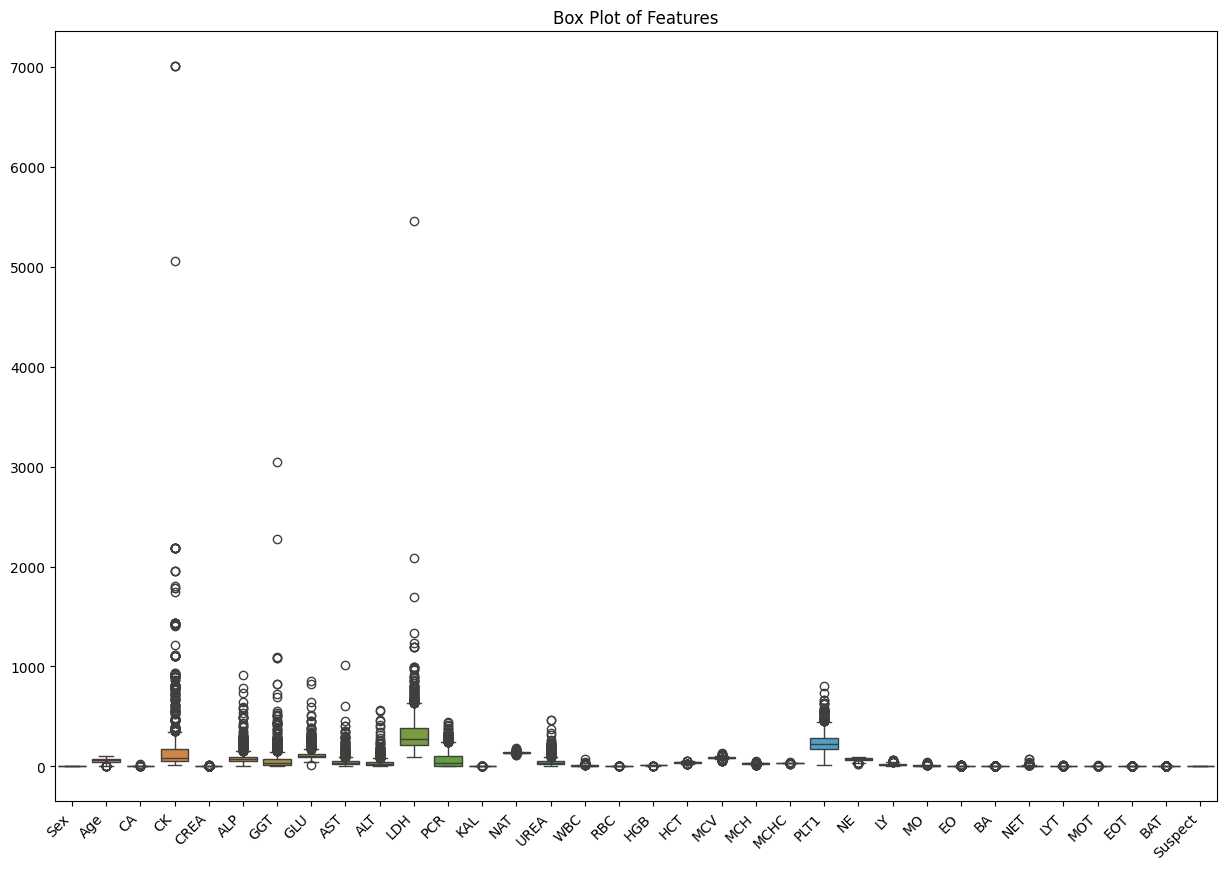

In [10]:

import matplotlib.pyplot as plt
df_target = df['target']
df_features = df.drop('target', axis=1)

fig, ax = plt.subplots(figsize=(15, 10))

sns.boxplot(data=df_features, ax=ax)
ax.set_xticklabels(df_features.columns, rotation=45, ha='right')
ax.set_title('Box Plot of Features')
plt.show()

In [11]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print("Train size ", len(X_train))
print("Test size ", len(X_test))

Train size  1388
Test size  348


In [14]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
print("Train data", model.score(X_train,y_train))
print("Test data" , model.score(X_test,y_test))


from sklearn.svm import SVC
model = SVC(kernel='rbf', C=100)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
print("Train data", model.score(X_train,y_train))
print("Test data" , model.score(X_test,y_test))

Train data 0.7211815561959655
Test data 0.7270114942528736
Train data 0.829250720461095
Test data 0.8017241379310345


In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Grey Wolf Optimization Algorithm
# Grey Wolf Optimization Algorithm
class GWO:
    def __init__(self, objective_function, dim, search_space, population_size=5, iterations=100):
        self.objective_function = objective_function
        self.dim = dim
        self.search_space = search_space
        self.population_size = population_size
        self.iterations = iterations

    # Update the initialize_population method to use the correct search space format
    def initialize_population(self):
      param_names = list(self.search_space.keys())
      population = np.random.uniform(low=[self.search_space[param][0] for param in param_names],
                                    high=[self.search_space[param][1] for param in param_names],
                                    size=(self.population_size, self.dim))
      return population



    def optimize(self, X_train, X_test, y_train, y_test):
      alpha_position = np.zeros(self.dim)
      beta_position = np.zeros(self.dim)
      delta_position = np.zeros(self.dim)

      alpha_score = float('inf')
      beta_score = float('inf')
      delta_score = float('inf')

      population = self.initialize_population()

      for iteration in range(self.iterations):
          for i in range(self.population_size):
              fitness = self.objective_function(population[i], X_train, X_test, y_train, y_test)

              if fitness < alpha_score:
                  alpha_score = fitness
                  alpha_position = population[i].copy()
              if fitness > alpha_score and fitness < beta_score:
                  beta_score = fitness
                  beta_position = population[i].copy()
              if fitness > alpha_score and fitness > beta_score and fitness < delta_score:
                  delta_score = fitness
                  delta_position = population[i].copy()

          a = 2 - iteration * ((2) / self.iterations)

          for i in range(self.population_size):
              r1 = np.random.random(self.dim)
              r2 = np.random.random(self.dim)
              A1 = 2 * a * r1 - a
              C1 = 2 * r2
              D_alpha = abs(C1 * alpha_position - population[i])
              X1 = alpha_position - A1 * D_alpha

              r1 = np.random.random(self.dim)
              r2 = np.random.random(self.dim)
              A2 = 2 * a * r1 - a
              C2 = 2 * r2
              D_beta = abs(C2 * beta_position - population[i])
              X2 = beta_position - A2 * D_beta

              r1 = np.random.random(self.dim)
              r2 = np.random.random(self.dim)
              A3 = 2 * a * r1 - a
              C3 = 2 * r2
              D_delta = abs(C3 * delta_position - population[i])
              X3 = delta_position - A3 * D_delta

              population[i] = (X1 + X2 + X3) / 3

      return alpha_position


In [16]:
from sklearn.neighbors import KNeighborsClassifier

def objective_function(params, X_train, X_test, y_train, y_test):
    param_names = list(search_space.keys())
    clf_params = dict(zip(param_names, params))

    clf = KNeighborsClassifier(n_neighbors=3)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    return -accuracy


In [17]:
# Update the search_space to a dictionary of parameter names and ranges
search_space = {
    'n_estimators': (50, 101),  # Range of values for n_estimators
    'max_depth': (1, 41)  # Range of values for max_depth
}


In [18]:
print("Length of search_space:", len(search_space))


Length of search_space: 2


In [19]:
# 1. Initialize GWO
gwo = GWO(objective_function, dim=2, search_space=search_space)

# 2. Run Optimization
best_params = gwo.optimize(X_train, X_test, y_train, y_test)




In [20]:
type(best_params)

numpy.ndarray

In [21]:
best_params[1]

18.771988768505725

In [22]:
# # Best parameters found: [53.39214019  2.66212098]
# best_params = {
#     'n_estimators': best_params[0],  # Number of trees in the forest
#     'max_depth': best_params[1],
# }

In [23]:
from sklearn.ensemble import RandomForestClassifier

best_rf = RandomForestClassifier(n_estimators=int(best_params[0]), max_depth=int(best_params[1]), random_state=42)

best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.8304597701149425
Confusion Matrix:
[[163  19]
 [ 40 126]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       182
           1       0.87      0.76      0.81       166

    accuracy                           0.83       348
   macro avg       0.84      0.83      0.83       348
weighted avg       0.83      0.83      0.83       348



<Axes: >

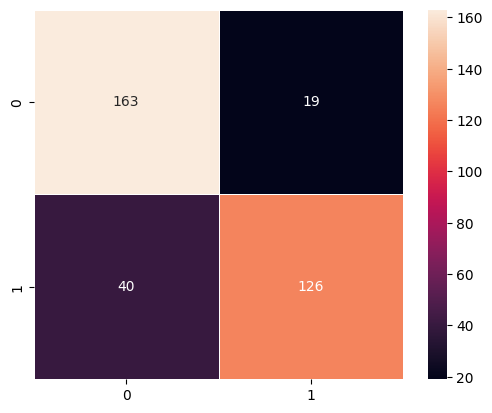

In [24]:
import matplotlib.pyplot as plt

# Assuming you have y_test and predictions
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
sns.heatmap(conf_matrix,annot = True, fmt = 'd', linewidth = 0.5, square = True)
